# Data Structures and Processing

## Final Exam

### Load Libraries

In [1]:
# Here is a list of some libraries to load. Add more when needed.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import imageio.v3 as iio
import datetime as dtime

## Problem 1

Write down a function `matching_lines_to_list` that takes two argument: `filename`, and `word`. The function `matching_lines_to_list` returns a list of all the lines containing `word` in them. Let us declare the second argument `word` to be optional, so that if `word` is not provided, the returned list should contain all lines in the file.

In [3]:
def matching_lines_list(filename,word):
    count = 0
    file_list = []
    with open(filename,'r') as file:
        for line in file:
            if file[line] == word:
                count = count + 1 
        if count > 0:
            return count    
        else:
            for line in file:
                file_list.append(file[line])
            return file_list


## Problem 2

A system of linear differential equations could be represented as

\begin{equation}
\nonumber
X^\prime(t) = AX(t)\,,
\end{equation}

where $X(t)$ represents a vector valued quantity that depends on
time $t$, and $A$ is a square matrix. A solution to such a
differential equation is given below

\begin{equation}
\nonumber
X(t) = e^{tA} X(0)\,,
\end{equation}

where $e^{tA}$ is the exponential of a matrix, and $X(0)$ is the
value of $X$ at 0.

Let us say that we do not know how to compute $e^{tA}$ exactly, but
we are allowed to use the following expression that would give an
equivalent approximate value to the exponential upto order $n$

\begin{equation}
\nonumber
e^{tA} \approx I + tA + \frac{t^2}{2!} A^2 + \frac{t^3}{3!} A^3 + \ldots + \frac{t^n}{n!} A^n\,.
\end{equation}

Given the above information, your task is to write down a function
`linear_solution` that takes four arguments:

1.  `A`, which is a `numpy` array corresponding to the square matrix
    $A$ of the linear equation above
2.  `t`, which is the value of the time $t$
3.  `X0`, which is a `numpy` array of shape `(m,1)` and it corresponds
    to the vector of length $m$ in above linear equation
4.  `n` is the order of approximation.

The function `linear_solution` must return a `numpy` array of shape
`(m,1)` that has the solution to the given linear equation.

Use your function to test for different values of `n`, `m` and `t` for the
matrix $A$ and a vector $X(0)$ below.

\begin{equation}
\nonumber
A= \begin{bmatrix} 1 & 0 \\ 1 & 1 \end{bmatrix},\qquad X_0 = \begin{bmatrix} 1 \\ 1 \end{bmatrix}
\end{equation}

**HINTS:**

1.  To compute power of a matrix, use the `np.linalg.matrix_power`. See
    builtin help for this function in Python.
2.  Testing your function is not part of grades.

In [28]:
def linear_solution(A,t,X0,n):
    first_value = np.eye(A.shape[0])
    result = 0 
    power_matrix = np.linal.matrix_power(A,X0)
    for i in range(i,n+1):
        current_value  = (t**n) * current_value * ((power_matrix) ** n)
        result = result + current_value
    result = first_value + result # adding the first value at the last
    return np.dot(result)



In [27]:
help(np.linalg.matrix_power)

Help on _ArrayFunctionDispatcher in module numpy.linalg:

matrix_power(a, n)
    Raise a square matrix to the (integer) power `n`.

    For positive integers `n`, the power is computed by repeated matrix
    squarings and matrix multiplications. If ``n == 0``, the identity matrix
    of the same shape as M is returned. If ``n < 0``, the inverse
    is computed and then raised to the ``abs(n)``.

    .. note:: Stacks of object matrices are not currently supported.

    Parameters
    ----------
    a : (..., M, M) array_like
        Matrix to be "powered".
    n : int
        The exponent can be any integer or long integer, positive,
        negative, or zero.

    Returns
    -------
    a**n : (..., M, M) ndarray or matrix object
        The return value is the same shape and type as `M`;
        if the exponent is positive or zero then the type of the
        elements is the same as those of `M`. If the exponent is
        negative the elements are floating-point.

    Raises
    ---

## Problem 3

Let us say that there is a table, named `biblio`, in a relational database management system whose only fields are: `id`, `title`, `authors`, `publisher`, `year`. The field `authors` has authors' names separated by commas when there are more than one authors and author's name is written in the format `"First Middle Last"`. Write down an SQL query to filter all authors with their first name starting with `F`. The returned table should have all but `id` and `publisher` fields.

In [ ]:
SELECT id, publisher
FROM biblio
WHERE authors LIKE 'F' OR ',F%' 

## Problem 4

Consider the `TSV` file, named `"imdb_ratings.tsv"` attached to this notebook. An important part of this task is to keep in mind is that the data in the `TSV` file has two columns: `stars_ratings`, which is a float, and `actors`, which is a string of actors (comma separated) acted in the movie. It is not important how many and what other columns are present. Write down a function `actors_average` that takes the following two arguments:

1.  `filename`, which is the the file name for the `TSV` file to be read.

2.  `actor`, which is the name of the actor for filtering.

The function `actors_average` returns the average of the `stars_rating` for the provided `actor`.


In [8]:
def actors_average(filename,actor):
    df = pd.read_csv(filename,delimiter='\t')
    filtered_df = df[df["actors"]]
    average_rating = filtered_df['start_ratings'].mean()
    return average_rating

## Problem 5

Consider the two files `imdb1.tsv` and `imdb2.tsv`. These two files share a column `"title"`. These can be used for the requested function below for testing.

Write down a function `combine_data_on_col`, which takes the following arguments:

1.  `"file1"` and `"file2"` are two `TSV`.
2.  `"col"` is the name of a shared column.

The function `combine_data_on_col` returns the data frame after merging the data from `file1` and `file2` on the shared column `col`.

In [4]:
def combine_data_on_col(file1,file2,col):
    df1 = pd.read_csv(file1,delimiter='/n') #in the file i see no ',' but still i added delimiter = '/n' as next line
    df2 = pd.read_csv(file1,delimiter='/n')
    combine = pd.merge(df1,df2, on=col)

    return combine


## Problem 6

Consider the file `AAPL.csv`, which has down-sampled data in it, where each record has a daily report of the `open`, `high`, `low` and `close` and other entries for Apple's stocks.

Your task is to down-sample the column `"Close"` to monthly periods using average values. Finally, plot the returned series.

In [24]:
df = pd.read_csv("AAPL.csv",parse_dates=['Date'],index_col='Date')
monthly_average = df["Close"].resample("mean").mean()
print(monthly_average)


ValueError: Invalid frequency: mean, failed to parse with error message: ValueError("Invalid frequency: MEAN, failed to parse with error message: KeyError('MEAN')")

## Problem 7

Consider the image `image.png` in the attachment. Your task is to plot a histogram of the `blue` channel.

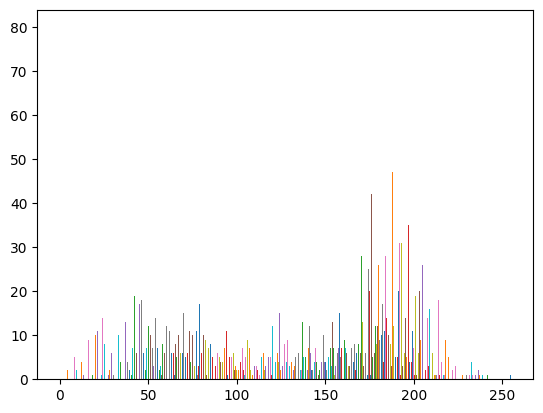

In [23]:
im = iio.imread("image.jpg")
im_image_blue = np.array(im)[:,:,1]
plt.hist(im_image_blue,bins=256,alpha=1.0)
plt.show()